<a href="https://colab.research.google.com/github/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_04/Pratica/Pratica_04_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática - IGTI - Modulo 04 - Fashion MNIST
- Autor: Rodrigo de Lima Oliveira
- Data : 26/06/2020
- LinkedIn: https://www.linkedin.com/in/rodrigolima82/

## Descrição do Problema

O objetivo desse exercício é classificar imagens através do uso de rede neural. Vamos treinar um modelo de rede neural para classificação de imagens de roupas. Teremos uma visão geral do uso do TensorFlow.

![title](https://github.com/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_04/Pratica/fashion.png?raw=1)


## Carregando as bibliotecas

In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados
import pandas as pd
import numpy as np

# Import para visualizacao dos dados
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Imports de bibliotecas para treinamento de redes neurais
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

print("Tensorflow version " + tf.__version__)


Tensorflow version 2.2.0


Using TensorFlow backend.


In [2]:
# Versões dos pacotes usados neste jupyter notebook
!pip install -q watermark
%reload_ext watermark
%watermark -a "Prática - Modulo 04 - Rodrigo" --iversions

tensorflow       2.2.0
tensorflow.keras 2.3.0-tf
matplotlib       3.2.2
pandas           1.0.5
numpy            1.18.5
Prática - Modulo 04 - Rodrigo


## Definindo algumas variáveis GLOBAIS

## Carregar os dados

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']


In [4]:
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


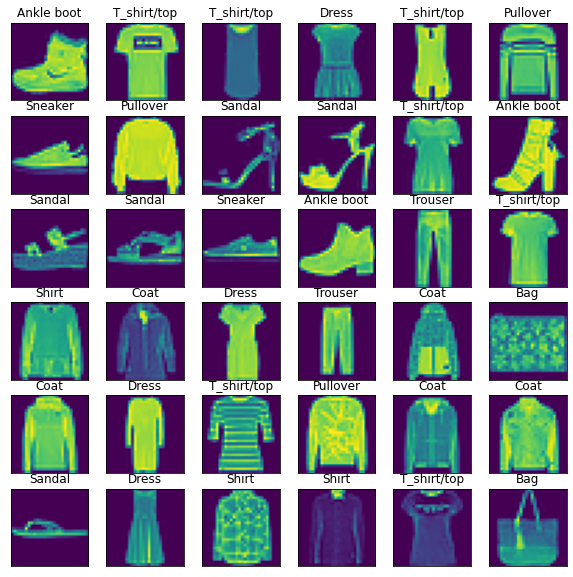

In [5]:

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

Para cada amostra de treinamento e teste é atribuído a uma das classes abaixo:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [6]:
batch_size = 32
epochs     = 10

In [7]:
x_train = train_images / 255.0
x_test  = test_images / 255.0

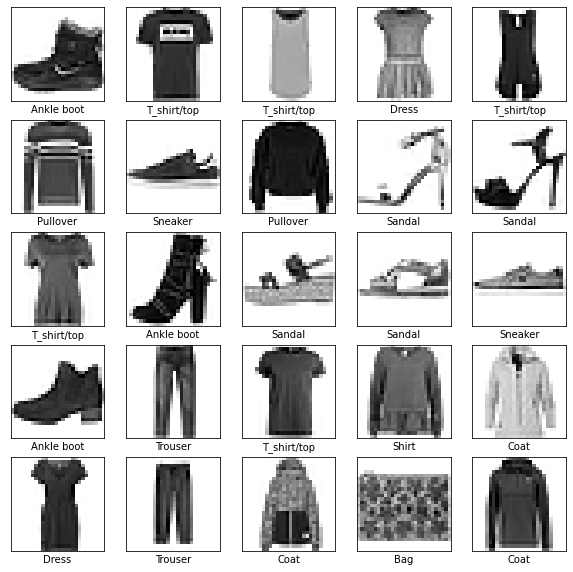

In [8]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [10]:
model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [11]:
model.fit(train_images,
          train_labels,
          batch_size = batch_size,
          epochs     = epochs,
          verbose    = 2)

Epoch 1/10
1875/1875 - 3s - loss: 3.5351 - accuracy: 0.6815
Epoch 2/10
1875/1875 - 3s - loss: 0.6904 - accuracy: 0.7228
Epoch 3/10
1875/1875 - 3s - loss: 0.6109 - accuracy: 0.7761
Epoch 4/10
1875/1875 - 3s - loss: 0.5598 - accuracy: 0.8083
Epoch 5/10
1875/1875 - 3s - loss: 0.5403 - accuracy: 0.8170
Epoch 6/10
1875/1875 - 3s - loss: 0.5143 - accuracy: 0.8234
Epoch 7/10
1875/1875 - 3s - loss: 0.5027 - accuracy: 0.8284
Epoch 8/10
1875/1875 - 3s - loss: 0.5042 - accuracy: 0.8294
Epoch 9/10
1875/1875 - 3s - loss: 0.4998 - accuracy: 0.8317
Epoch 10/10
1875/1875 - 3s - loss: 0.4934 - accuracy: 0.8323


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.5408 - accuracy: 0.8225

Test accuracy:  0.8224999904632568


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([2.9932750e-21, 1.9442569e-14, 0.0000000e+00, 7.0930597e-18,
       0.0000000e+00, 9.9785011e-03, 3.5806978e-25, 1.9352263e-02,
       6.5557217e-13, 9.7066921e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))
               
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
               
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
               
               

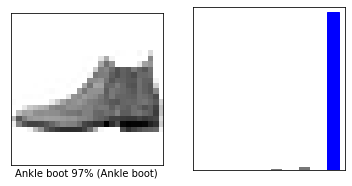

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

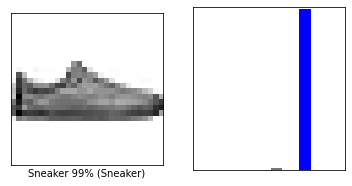

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

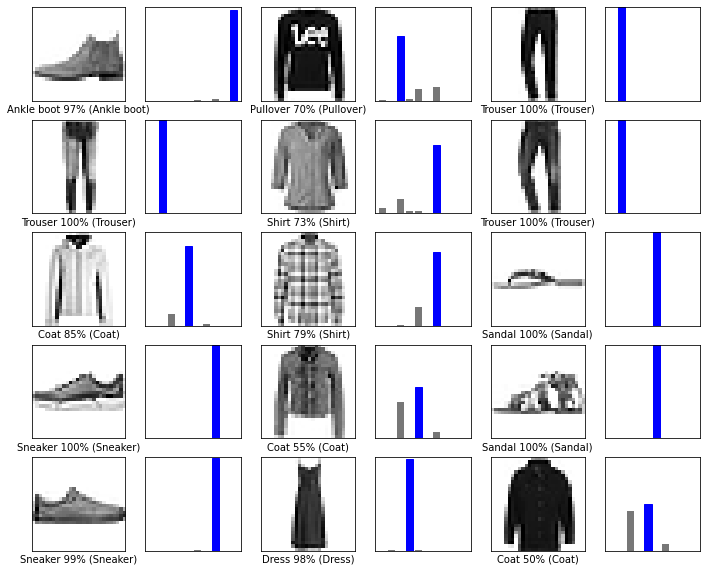

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    
plt.show()

In [20]:
img = test_images[0]

print(img.shape)

(28, 28)


In [21]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.9932750e-21 1.9442569e-14 0.0000000e+00 7.0930597e-18 0.0000000e+00
  9.9785011e-03 3.5806978e-25 1.9352263e-02 6.5557211e-13 9.7066921e-01]]


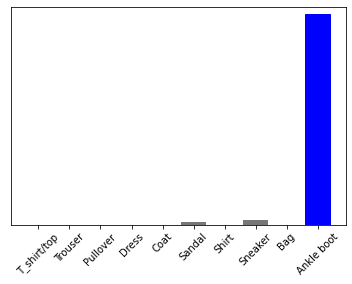

In [23]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [24]:
np.argmax(predictions_single[0])

9

# FIM